# Library

In [10]:
import itertools
import functools

import math

import numpy as np
import pandas as pd

import pyreadr

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
import seaborn as sns

from scipy.spatial.distance import pdist, squareform

import umap
import umap.plot

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data loading

In [3]:
clean_data = pyreadr.read_r('./data/absolute_dataset._clean_.RData')['absolute_dataset']
prot_matr_fc = pyreadr.read_r('./data/proteins.matrix.sva.0.5.1.FC.RData')['proteins.matrix.sva.0.5.1.FC']
prot_matr = pyreadr.read_r('./data/proteins.matrix.sva.0.5.1.RData')['proteins.matrix.sva.0.5.1']
orf2name = pyreadr.read_r('./data/orf2name._clean_.RData')['orf2name']
exp_metadata = pyreadr.read_r('./data/exp_metadata._clean_.RData')['exp_metadata']

# yeat metabolic model
imm904 = pyreadr.read_r('./data/iMM904._load_.RData')['iMM904']

metabolite_order = pd.read_csv('./data/metabolites.txt', delimiter='\t')
metabolie2imm904 = pyreadr.read_r('./data/metabolite2iMM904._load_.RData')['metabolite2iMM904']
gene_annotation = pyreadr.read_r('./data/gene.annotations._load_.RData')['gene.annotations']
go = pyreadr.read_r('./data/GO.raw._load_.RData')['GO.raw']

# brenda
brenda = pd.read_csv('./data/brenda.txt', delimiter='\t')

# metabolite data
tca_dataset = pyreadr.read_r('./data/dataTCA.create_datasets.RData')
aa_dataset = pyreadr.read_r('./data/dataAA.create_datasets.RData')

# models data
final_models_data = pyreadr.read_r('./data/all_final_models.models.data_prep.RData')['all_final_models.models']
prep_models_data = pyreadr.read_r('./data/all_linear_models.data_prep.RData')['all_linear_models']

# intervals
prediction_intervals = pyreadr.read_r('./data/prediction.intervals.data_prep.RData')['prediction.intervals']
prediction_models = pyreadr.read_r('./data/prediction.models.data_prep.RData')['prediction.models']

# raw
raw_metabolites = pd.read_csv('./data/metabolites_dataset.data_prep.tsv', delimiter='\t')
raw_proteins = pd.read_csv('./data/proteins_dataset.data_prep.tsv', delimiter='\t')

# Paper reproduction

In [14]:
RHS = raw_proteins.groupby(by=['KO_ORF', 'ORF'])['value'].mean().to_frame().pivot_table(index='KO_ORF', columns='ORF', values='value')

In [13]:
LHS = raw_metabolites.pivot_table(index='genotype', columns='metabolite_id', values='value')

In [21]:
LHS.reset_index().merge(RHS, left_on='genotype', right_on='KO_ORF').set_index('genotype')

,3pg;2pg,6pgc,accoa,adp,akg,ala-L;ala-B,amp,arg-L,asn-L,asp-L,...,YPR129W,YPR133C,YPR145W,YPR160W,YPR163C,YPR165W,YPR181C,YPR183W,YPR187W,YPR191W
genotype,,,,,,,,,,,,,,,,,,,,,
WT,425.328812,173.986512,4.820485,NaN,10.377185,148.374767,NaN,171.119990,30.131845,169.702219,...,5.738004,4.430017,5.968589,6.595729,6.601029,7.000108,5.980433,7.088910,3.988492,7.924372
YAL017W,151.279057,60.629036,4.187382,NaN,11.189301,NaN,NaN,NaN,NaN,NaN,...,5.700908,4.217437,6.162511,6.346719,6.599880,6.779993,5.923372,6.968445,4.202141,7.681192
YAR018C,196.478799,96.809625,4.654009,NaN,11.734239,NaN,NaN,NaN,NaN,NaN,...,5.923459,4.385032,6.156135,6.281785,6.266781,7.027697,6.008542,7.112073,4.386444,7.684376
YBL016W,668.226067,341.434241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.832453,4.964154,6.740919,5.693421,6.043633,6.657580,5.873661,7.482665,5.937317,7.617765
YBL088C,130.446867,69.913588,3.701013,NaN,10.349731,163.073977,NaN,177.408777,28.073611,181.477538,...,5.594639,3.831137,6.382750,5.368199,6.546663,6.783263,5.605587,7.399478,4.075732,7.128637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPL150W,584.790730,319.802626,NaN,15204.676363,NaN,NaN,3170.669200,NaN,NaN,NaN,...,5.345673,3.732262,6.612226,5.438091,6.525070,6.602738,5.898183,7.261391,4.227529,6.890138
YPL203W,987.269563,467.852082,NaN,18660.682062,NaN,NaN,4025.363605,NaN,NaN,NaN,...,5.526688,3.281518,6.111511,6.142694,6.161997,6.647831,6.033969,7.293977,4.404043,7.469359
YPL236C,872.368314,398.396387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.719280,3.051739,6.355860,4.636012,6.793997,6.868664,5.896490,7.195345,4.019563,6.876519


In [51]:
brenda['ecNumber'].value_counts()

3.4.16.5     109
4.1.1.49     102
1.1.2.3       91
1.5.1.7       67
2.2.1.1       60
            ... 
2.6.1.1        1
2.1.1.225      1
3.1.3.84       1
3.6.1.13       1
6.3.4.15       1
Name: ecNumber, Length: 372, dtype: int64

In [3]:
all(raw_proteins[raw_proteins['KO_ORF'] == 'WT']['ORF'].unique() == raw_proteins[raw_proteins['KO_ORF'] == 'YPR111W']['ORF'].unique())

True

In [48]:
len(raw_metabolites[raw_metabolites['genotype'] == 'WT']['metabolite_id'].unique())

45

In [12]:
raw_proteins

,ORF,sample,replicate,KO_ORF,KO_gene_name,value
0,YAL003W,KL_Try_001_a,1,WT,WT,8.778819
1,YAL005C,KL_Try_001_a,1,WT,WT,9.132257
2,YAL007C,KL_Try_001_a,1,WT,WT,5.188600
3,YAL012W,KL_Try_001_a,1,WT,WT,8.822701
4,YAL035W,KL_Try_001_a,1,WT,WT,4.919708
...,...,...,...,...,...,...
264259,YPR165W,KL_Try_99_c_1,6,YNL183C,NPR1,6.789486
264260,YPR181C,KL_Try_99_c_1,6,YNL183C,NPR1,6.055757
264261,YPR183W,KL_Try_99_c_1,6,YNL183C,NPR1,7.347029
264262,YPR187W,KL_Try_99_c_1,6,YNL183C,NPR1,4.298411


In [14]:
raw_proteins.pivot_table(values=['value'], index=['ORF', 'KO_ORF'])

value
ORF     KO_ORF           
YAL003W WT       8.673124
        YAL017W  8.662766
        YAR018C  8.780733
        YBL016W  8.544490
        YBL088C  8.688434
...                   ...
YPR191W YPL150W  6.890138
        YPL203W  7.469359
        YPL236C  6.876519
        YPR106W  7.440676
        YPR111W  7.441776

[71148 rows x 1 columns]

In [9]:
len(imm904['metabolite'].unique())

691

In [34]:
raw_proteins[raw_proteins['ORF'] == 'YGL253W']

,ORF,sample,replicate,KO_ORF,KO_gene_name,value
263,YGL253W,KL_Try_001_a,1,WT,WT,8.534627
989,YGL253W,KL_Try_001_b,2,WT,WT,8.578882
1715,YGL253W,KL_Try_001_c,3,WT,WT,8.618133
2441,YGL253W,KL_Try_003_a,1,YDR283C,GCN2,8.784255
3167,YGL253W,KL_Try_003_b,2,YDR283C,GCN2,8.827923
...,...,...,...,...,...,...
260897,YGL253W,KL_Try_99_a_1,2,YNL183C,NPR1,8.226027
261623,YGL253W,KL_Try_99_b,3,YNL183C,NPR1,8.298799
262349,YGL253W,KL_Try_99_b_1,4,YNL183C,NPR1,8.253239
263075,YGL253W,KL_Try_99_c,5,YNL183C,NPR1,8.100552


In [9]:
prot_matr_fc.pivot_table(values=['logFC', 'p.value', 'p.value_BH', 'p.value_bonferroni'], index='KO', columns='ORF')

logFC                                                              \
ORF       YAL003W   YAL005C   YAL007C   YAL012W   YAL035W   YAL038W   YAL042W   
KO                                                                              
YAL017W -0.010358 -0.093368  0.116756 -0.068212 -0.080620  0.038818 -0.944900   
YAR018C  0.107609 -0.375313 -0.018815 -0.242755  0.190519  0.129505  0.125123   
YBL016W -0.128634 -0.313682 -0.413314  0.338306 -1.743336 -0.705179  0.581757   
YBL088C  0.015310 -0.184184 -0.044193  0.300574 -1.748918 -0.583874 -0.004341   
YBR028C -0.090297 -0.925310 -0.207286  0.135497  0.570557  0.154040 -0.176666   
...           ...       ...       ...       ...       ...       ...       ...   
YPL150W  0.257701 -0.932510 -0.159819  0.210563 -2.263465 -0.137956 -0.885873   
YPL203W -0.229098 -0.391129 -0.021471 -0.200804 -0.110001  0.221958 -0.308802   
YPL236C -0.317064 -0.434949 -0.314429  0.205935 -0.999500 -0.049869 -0.294226   
YPR106W  0.113277 -0.654711 -0.001306  0.276394 -2.302911 -0.568907  0.679658   
YPR111W -0.139099 -0.322116 -0.104928  0.205304 -1.348026 -0.628126  0.102932   

                                       ... p.value_bonferroni          \
ORF       YAL044C YAR002C-A   YAR007C  ...            YPR129W YPR133C   
KO                                     ...                              
YAL017W  0.105093 -0.202054  0.103038  ...                1.0     1.0   
YAR018C  0.407614 -0.059512  0.053708  ...                1.0     1.0   
YBL016W  1.171616  0.472714  0.323027  ...                1.0     1.0   
YBL088C  0.397385 -0.041571 -0.133860  ...                1.0     1.0   
YBR028C -0.022038 -0.172579 -0.049737  ...                1.0     1.0   
...           ...       ...       ...  ...                ...     ...   
YPL150W  0.354849 -0.177358 -0.100042  ...                1.0     1.0   
YPL203W  0.247558  0.039711  0.216897  ...                1.0     1.0   
YPL236C  0.177165  0.144125 -0.012206  ...                1.0     1.0   
YPR106W  1.060224  0.497651  0.246322  ...                1.0     1.0   
YPR111W  0.236665  0.123429 -0.048947  ...                1.0     1.0   

                                                                         \
ORF           YPR145W       YPR160W   YPR163C YPR165W YPR181C   YPR183W   
KO                                                                        
YAL017W  1.000000e+00  1.000000e+00  1.000000     1.0     1.0  1.000000   
YAR018C  1.000000e+00  1.000000e+00  1.000000     1.0     1.0  1.000000   
YBL016W  8.179395e-11  1.123323e-01  1.000000     1.0     1.0  0.041698   
YBL088C  5.277279e-01  9.781050e-06  1.000000     1.0     1.0  1.000000   
YBR028C  2.157408e-02  1.161372e-08  1.000000     1.0     1.0  1.000000   
...               ...           ...       ...     ...     ...       ...   
YPL150W  7.853142e-07  8.658594e-05  1.000000     1.0     1.0  1.000000   
YPL203W  1.000000e+00  1.000000e+00  1.000000     1.0     1.0  1.000000   
YPL236C  1.000000e+00  1.625159e-17  1.000000     1.0     1.0  1.000000   
YPR106W  1.697379e-11  1.309688e-08  0.000402     1.0     1.0  0.000924   
YPR111W  1.000000e+00  1.482255e-07  1.000000     1.0     1.0  1.000000   

                                 
ORF       YPR187W       YPR191W  
KO                               
YAL017W  1.000000  1.000000e+00  
YAR018C  1.000000  1.000000e+00  
YBL016W  0.005007  1.223162e-01  
YBL088C  1.000000  2.172499e-24  
YBR028C  1.000000  2.035705e-23  
...           ...           ...  
YPL150W  1.000000  7.253213e-38  
YPL203W  1.000000  2.991228e-07  
YPL236C  1.000000  1.214127e-38  
YPR106W  1.000000  1.675313e-08  
YPR111W  1.000000  1.874723e-08  

[97 rows x 2904 columns]

In [7]:
prot_matr_fc

,ORF,contrasts,logFC,p.value,p.value_BH,p.value_bonferroni,KO,reference
0,YAL003W,YAL017W-WT,-0.010358,9.385992e-01,9.614959e-01,1.000000e+00,YAL017W,WT
1,YAL003W,YAR018C-WT,0.107609,4.238359e-01,5.598622e-01,1.000000e+00,YAR018C,WT
2,YAL003W,YBL016W-WT,-0.128634,3.391701e-01,4.753336e-01,1.000000e+00,YBL016W,WT
3,YAL003W,YBL088C-WT,0.015310,9.093521e-01,9.434310e-01,1.000000e+00,YBL088C,WT
4,YAL003W,YBR028C-WT,-0.090297,5.020695e-01,6.316246e-01,1.000000e+00,YBR028C,WT
...,...,...,...,...,...,...,...,...
70417,YPR191W,YPL150W-WT,-1.034235,1.029964e-42,9.298991e-40,7.253213e-38,YPL150W,WT
70418,YPR191W,YPL203W-WT,-0.455013,4.247577e-12,8.782233e-11,2.991228e-07,YPL203W,WT
70419,YPR191W,YPL236C-WT,-1.047854,1.724073e-43,1.759604e-40,1.214127e-38,YPL236C,WT
70420,YPR191W,YPR106W-WT,-0.483696,2.378962e-13,5.976856e-12,1.675313e-08,YPR106W,WT


In [41]:
len(raw_metabolites['official_name'].unique())

50

## Figure 2 reproduction

In [4]:
prot_matr_fc = prot_matr_fc[
    (prot_matr_fc['KO'].isin(exp_metadata[exp_metadata['type'] == 'Kinase']['ORF'].unique())) &
    (prot_matr_fc['ORF']).isin(imm904['gene']) &
    (prot_matr_fc['p.value_BH']  < 0.01) &
    (abs(prot_matr_fc['logFC']) > math.log2(1.4/0.714))
]

prot_matr_fc = prot_matr_fc.merge(orf2name[['ORF', 'gene_name']], left_on='KO', right_on='ORF', suffixes=(None, '_right'))

# prot_matr_fc[prot_matr_fc['gene_name'] == 'KDX1']
prot_matr_fc

,ORF,contrasts,logFC,p.value,p.value_BH,p.value_bonferroni,KO,reference,ORF_right,gene_name
0,YAL038W,YER129W-WT,-1.165160,1.157484e-40,8.151235e-38,8.151235e-36,YER129W,WT,YER129W,SAK1
1,YBR115C,YER129W-WT,-1.447165,2.172409e-04,9.925094e-04,1.000000e+00,YER129W,WT,YER129W,SAK1
2,YBR221C,YER129W-WT,-1.034736,8.353716e-22,7.087776e-20,5.882854e-17,YER129W,WT,YER129W,SAK1
3,YGL008C,YER129W-WT,-1.270291,7.553802e-12,1.502270e-10,5.319538e-07,YER129W,WT,YER129W,SAK1
4,YGR208W,YER129W-WT,1.038642,3.616926e-05,2.012095e-04,1.000000e+00,YER129W,WT,YER129W,SAK1
...,...,...,...,...,...,...,...,...,...,...
1225,YGR192C,YLL019C-WT,-1.275514,1.077783e-04,5.323677e-04,1.000000e+00,YLL019C,WT,YLL019C,KNS1
1226,YJL153C,YLL019C-WT,-1.156183,7.472814e-15,2.334740e-13,5.262505e-10,YLL019C,WT,YLL019C,KNS1
1227,YKL181W,YAL017W-WT,0.984922,3.133475e-04,1.369148e-03,1.000000e+00,YAL017W,WT,YAL017W,PSK1
1228,YMR105C,YNR047W-WT,-1.200005,6.078813e-10,8.855651e-09,4.280822e-05,YNR047W,WT,YNR047W,FPK1


In [36]:
upr_genes = prot_matr_fc[prot_matr_fc['logFC'] > 0]
downr_genes = prot_matr_fc[prot_matr_fc['logFC'] < 0]

wide_full = prot_matr_fc.pivot_table(index=['KO', 'gene_name'], columns='ORF', values='logFC').fillna(0).sort_values(by=['gene_name'])
wide_full[wide_full != 0] = 1

wide_upr = upr_genes.pivot_table(index=['KO', 'gene_name'], columns='ORF', values='logFC').fillna(0).sort_values(by=['gene_name'])
wide_upr[wide_upr != 0] = 1

wide_downr = downr_genes.pivot_table(index=['KO', 'gene_name'], columns='ORF', values='logFC').fillna(0).sort_values(by=['gene_name'])
wide_downr[wide_downr != 0] = 1

wide_upr

,ORF,YAL044C,YBL064C,YBR035C,YBR205W,YCL009C,YCL050C,YCR005C,YDL100C,YDR074W,YDR098C,...,YLR438W,YML022W,YMR215W,YMR300C,YOL030W,YOR095C,YPL262W,YPR035W,YPR062W,YPR145W
KO,gene_name,,,,,,,,,,,,,,,,,,,,,
YBR059C,AKL1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
YGL021W,ALK1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YNL020C,ARK1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YJL095W,BCK1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YGR188C,BUB1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YHR135C,YCK1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YNL154C,YCK2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YOL128C,YGK3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
wide_index = wide_full.index.get_level_values('gene_name')
upr_index = wide_upr.index.get_level_values('gene_name')
downr_index = wide_downr.index.get_level_values('gene_name')

In [38]:
metric = 'jaccard'

wide_full_dist = 1 - squareform(pdist(wide_full.values, metric=metric))
wide_upr_dist = 1 - squareform(pdist(wide_upr.values, metric=metric))
wide_downr_dist = 1 - squareform(pdist(wide_downr.values, metric=metric))

print(f'{wide_full_dist.shape=} \n{wide_upr_dist.shape=} \n{wide_downr_dist.shape=}')

proj_wide_upr_dist = np.zeros(wide_full_dist.shape)
mask = np.array(np.where(np.in1d(wide_index, upr_index))[0])
proj_wide_upr_dist[mask[:, np.newaxis], mask] = wide_upr_dist

proj_wide_downr_dist = np.zeros(wide_full_dist.shape)
mask = np.array(np.where(np.in1d(wide_index, downr_index))[0])
proj_wide_downr_dist[mask[:, np.newaxis], mask] = wide_downr_dist

zeros = np.zeros(shape=wide_full_dist.shape)
zeros[np.logical_not(np.tri(*zeros.shape, dtype=np.bool_))] = proj_wide_upr_dist[np.logical_not(np.tri(*zeros.shape, dtype=np.bool_))]
zeros[np.tri(*zeros.shape, dtype=np.bool_)] = proj_wide_downr_dist[np.tri(*zeros.shape, dtype=np.bool_)] * -1

wide_full_dist.shape=(94, 94) 
wide_upr_dist.shape=(79, 79) 
wide_downr_dist.shape=(93, 93)


[[0.01960784 0.18823529 0.38039216 1.        ]
 [0.18431373 0.47266436 0.71164937 1.        ]
 [0.51787774 0.73794694 0.85190311 1.        ]
 [0.86051519 0.91741638 0.94871203 1.        ]
 [0.98477509 0.89327182 0.83944637 1.        ]
 [0.94071511 0.60991926 0.48127643 1.        ]
 [0.76170704 0.22145329 0.22875817 1.        ]
 [0.40392157 0.         0.12156863 1.        ]]
[[0.01960784 0.18823529 0.38039216 1.        ]
 [0.18431373 0.47266436 0.71164937 1.        ]
 [0.51787774 0.73794694 0.85190311 1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [0.94071511 0.60991926 0.48127643 1.        ]
 [0.76170704 0.22145329 0.22875817 1.        ]
 [0.40392157 0.         0.12156863 1.        ]]


<AxesSubplot:>

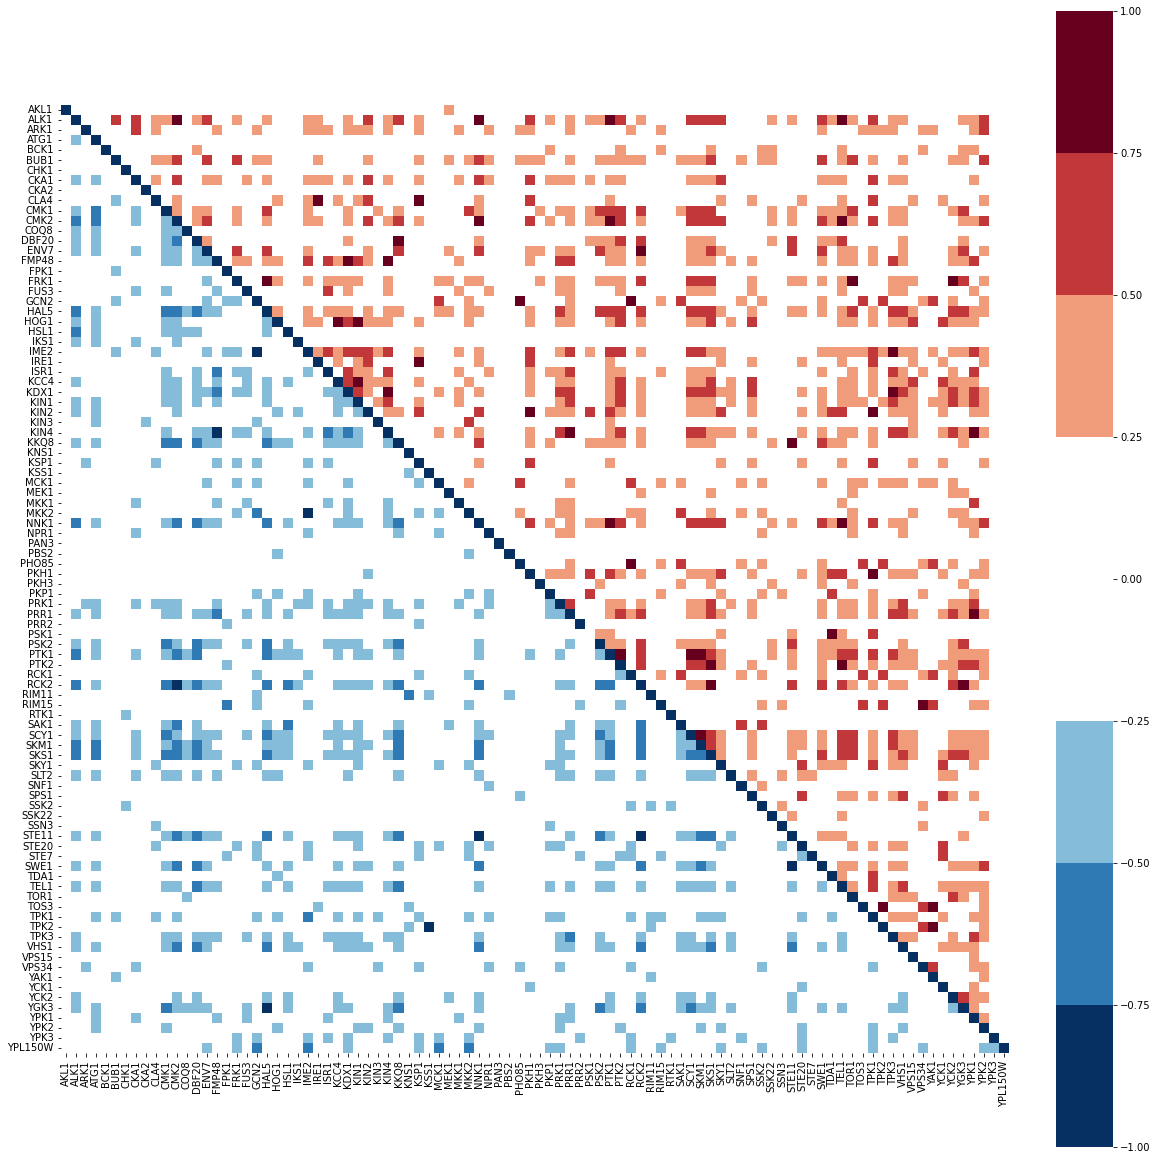

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16), constrained_layout=True)

bounds = np.linspace(-1, 1, 9)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

cmap = cm.get_cmap('RdBu_r', 256)
cmap = cmap(norm(bounds[:-1]))
print(cmap)
cmap[3] = [1,1,1,1]
cmap[4] = [1,1,1,1]
# print(cmap(norm.boundaries))
print(cmap)

colors.ListedColormap(cmap)

sns.heatmap(
    zeros,
    cbar=True,
    ax=ax,
    square=True,
    cmap=colors.ListedColormap(cmap),
    # norm=norm,
    xticklabels=wide_full.index.get_level_values('gene_name').tolist(),
    yticklabels=wide_full.index.get_level_values('gene_name').tolist()
)

# pcm = ax.pcolor(zeros, norm=norm, cmap='RdBu_r')
# # The colorbar inherits the "extend" argument from BoundaryNorm.
# fig.colorbar(pcm, ax=ax, orientation='vertical')
# ax.set_title('BoundaryNorm: extend="both"')
# plt.show()

## Figure 4 reporduction

In [9]:
metabolite_order

,met_name,metabolite,pathway,method,Order
0,L-Phenylalanine,phenylalanine,Aromatic family,AA,0
1,L-Tryptophan,tryptophan,Aromatic family,AA,0
2,L-Tyrosine,tyrosine,Aromatic family,AA,0
3,L-Asparagine,asparagine,Aspartate family,AA,0
4,L-Aspartate,aspartate,Aspartate family,AA,0
5,L-Threonine,threonine,Aspartate family,AA,0
6,L-Arginine,arginine,Glutamate family,AA,0
7,L-Glutamate,glutamate,Glutamate family,AA,0
8,L-Glutamine,glutamine,Glutamate family,AA,0
9,L-Lysine,lysine,Glutamate family,AA,0


In [10]:
metabolite_order[['metabolite', 'pathway']]

,metabolite,pathway
0,phenylalanine,Aromatic family
1,tryptophan,Aromatic family
2,tyrosine,Aromatic family
3,asparagine,Aspartate family
4,aspartate,Aspartate family
5,threonine,Aspartate family
6,arginine,Glutamate family
7,glutamate,Glutamate family
8,glutamine,Glutamate family
9,lysine,Glutamate family


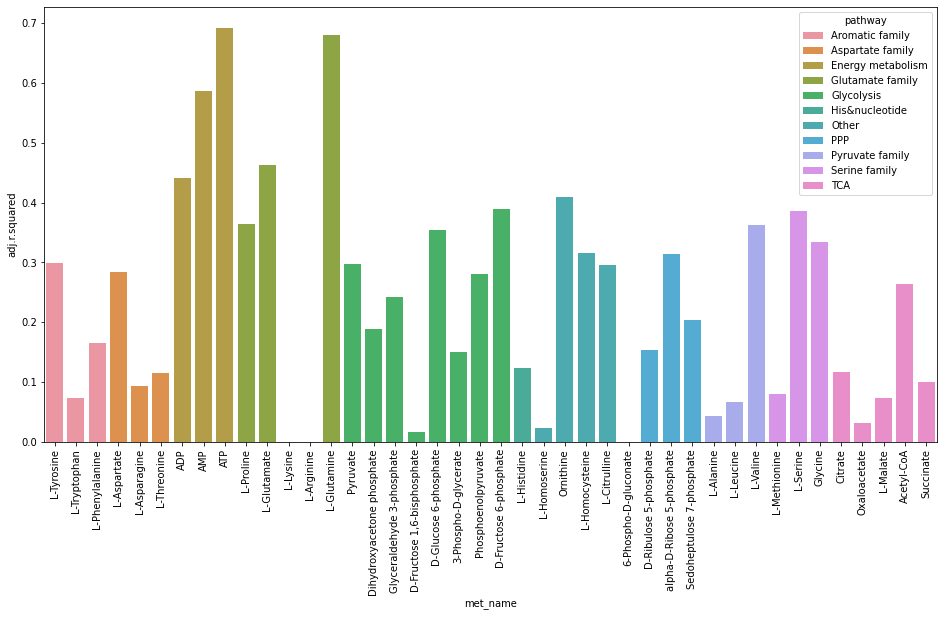

In [11]:
df = final_models_data[
    (final_models_data['metabolite']).isin(metabolite_order['metabolite']) &
    (final_models_data['degree'] == "1") &
    (final_models_data['ismetIncluded'] == "0") & 
    (final_models_data['the_super_best'] == True) &
    (final_models_data['isImputed'] == 0.0) &
    (final_models_data['isAutocorrelation.bonferoni'] == 0.0)
]

df = df[['metabolite', 'adj.r.squared']].drop_duplicates()
df = df.merge(metabolite_order[['metabolite', 'pathway', 'met_name']], on='metabolite')

df = df.sort_values('pathway')

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

g = sns.barplot(
    x='met_name',
    y='adj.r.squared',
    hue='pathway',
    # order='pathway',
    data=df,
    ax=ax,
    dodge=False,
    ci=None
)

plt.xticks(rotation=90)

g.set(ylim=(0, None))

plt.show()

# Project

In [76]:
# first we transform the data to categories
to_categorical = {
    'metabolite_id': 'category',
    'kegg_id': 'category',
    'official_name': 'category',
    'genotype': 'category',
}

metabolites_df = raw_metabolites.fillna('Unknown')
metabolites_df = metabolites_df.astype(to_categorical)
metabolites_df = metabolites_df.merge(metabolite_order[['met_name', 'pathway']], left_on='official_name', right_on='met_name', how='left')
metabolites_df['pathway'] = metabolites_df['pathway'].fillna('Unknown')
metabolites_df['met_name'] = metabolites_df['met_name'].fillna('Unknown')
metabolites_df = metabolites_df.sort_values(by='pathway')

metabolites_df.describe(include='all')

,metabolite_id,kegg_id,official_name,dataset,genotype,replicate,value,met_name,pathway
count,3522,3522,3522,3522.000000,3522,3522.000000,3522.000000,3522,3522
unique,50,50,50,NaN,96,NaN,NaN,42,12
top,3pg;2pg,C00111,6-Phospho-D-gluconate,NaN,YPL140C,NaN,NaN,Unknown,Glycolysis
freq,148,148,148,NaN,145,NaN,NaN,691,883
mean,NaN,NaN,NaN,1.857183,NaN,1.533220,2702.901412,NaN,NaN
std,NaN,NaN,NaN,0.819938,NaN,0.767231,5975.218172,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,1.000000,0.004140,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.000000,10.704988,NaN,NaN
50%,NaN,NaN,NaN,2.000000,NaN,1.000000,92.916859,NaN,NaN
75%,NaN,NaN,NaN,3.000000,NaN,2.000000,891.112487,NaN,NaN


In [77]:
metabolites_df

,metabolite_id,kegg_id,official_name,dataset,genotype,replicate,value,met_name,pathway
3431,trp-L,C00078,L-Tryptophan,3,YPL141C,1,0.424480,L-Tryptophan,Aromatic family
3414,trp-L,C00078,L-Tryptophan,3,YHR079C,3,0.371426,L-Tryptophan,Aromatic family
3415,trp-L,C00078,L-Tryptophan,3,YHR082C,1,0.326815,L-Tryptophan,Aromatic family
3416,trp-L,C00078,L-Tryptophan,3,YHR082C,2,0.340360,L-Tryptophan,Aromatic family
3417,trp-L,C00078,L-Tryptophan,3,YHR082C,3,0.315160,L-Tryptophan,Aromatic family
...,...,...,...,...,...,...,...,...,...
960,glc-D,C00031,D-Glucose,1,YIL095W,1,14862.885793,Unknown,Unknown
959,glc-D,C00031,D-Glucose,1,YIL042C,1,18332.892252,Unknown,Unknown
958,glc-D,C00031,D-Glucose,1,YIL035C,1,13004.592505,Unknown,Unknown
967,glc-D,C00031,D-Glucose,1,YJL165C,1,19089.001739,Unknown,Unknown


In [13]:
# first we transform the data to categories
to_categorical = {
    'ORF': 'category',
    'sample': 'category',
    'KO_ORF': 'category',
    'KO_gene_name': 'category',
}

proteins_df = raw_proteins.astype(to_categorical)

proteins_df.describe(include='all')

,ORF,sample,replicate,KO_ORF,KO_gene_name,value
count,264264,264264,264264.000000,264264,264264,264264.000000
unique,726,364,NaN,98,98,NaN
top,YAL003W,KL_Try_001_a,NaN,WT,WT,NaN
freq,364,726,NaN,8712,8712,NaN
mean,NaN,NaN,2.681319,NaN,NaN,6.307523
std,NaN,NaN,1.715345,NaN,NaN,1.418793
min,NaN,NaN,1.000000,NaN,NaN,0.891259
25%,NaN,NaN,1.000000,NaN,NaN,5.328361
50%,NaN,NaN,2.000000,NaN,NaN,6.264424
75%,NaN,NaN,3.000000,NaN,NaN,7.263535


In [14]:
proteins_df[
    (~proteins_df['KO_ORF'].isin(metabolites_df['genotype']))
]

,ORF,sample,replicate,KO_ORF,KO_gene_name,value
10890,YAL003W,KL_Try_007_a,1,YLR240W,VPS34,8.469039
10891,YAL005C,KL_Try_007_a,1,YLR240W,VPS34,8.738073
10892,YAL007C,KL_Try_007_a,1,YLR240W,VPS34,4.967732
10893,YAL012W,KL_Try_007_a,1,YLR240W,VPS34,8.474297
10894,YAL035W,KL_Try_007_a,1,YLR240W,VPS34,4.935572
...,...,...,...,...,...,...
236671,YPR165W,KL_Try_13_c_1,3,YPL031C,PHO85,7.028272
236672,YPR181C,KL_Try_13_c_1,3,YPL031C,PHO85,5.674753
236673,YPR183W,KL_Try_13_c_1,3,YPL031C,PHO85,7.094970
236674,YPR187W,KL_Try_13_c_1,3,YPL031C,PHO85,3.632241


In [15]:
metabolites_df[
    metabolites_df['official_name'].isin(metabolite_order['met_name'])
]

,metabolite_id,kegg_id,official_name,dataset,genotype,replicate,value,met_name,pathway
3431,trp-L,C00078,L-Tryptophan,3,YPL141C,1,0.424480,L-Tryptophan,Aromatic family
3414,trp-L,C00078,L-Tryptophan,3,YHR079C,3,0.371426,L-Tryptophan,Aromatic family
3415,trp-L,C00078,L-Tryptophan,3,YHR082C,1,0.326815,L-Tryptophan,Aromatic family
3416,trp-L,C00078,L-Tryptophan,3,YHR082C,2,0.340360,L-Tryptophan,Aromatic family
3417,trp-L,C00078,L-Tryptophan,3,YHR082C,3,0.315160,L-Tryptophan,Aromatic family
...,...,...,...,...,...,...,...,...,...
2645,cit,C00158,Citrate,2,YDR477W,2,34.506523,Citrate,TCA
2644,cit,C00158,Citrate,2,YDR477W,1,29.576093,Citrate,TCA
2654,cit,C00158,Citrate,2,YHL007C,3,13.566058,Citrate,TCA
2393,akg,C00026,2-Oxoglutarate,2,WT,1,10.377185,2-Oxoglutarate,TCA


In [16]:
metabolites_df.describe(include='all')

,metabolite_id,kegg_id,official_name,dataset,genotype,replicate,value,met_name,pathway
count,3522,3522,3522,3522.000000,3522,3522.000000,3522.000000,2831,3522
unique,50,50,50,NaN,96,NaN,NaN,41,12
top,3pg;2pg,C00111,6-Phospho-D-gluconate,NaN,YPL140C,NaN,NaN,Sedoheptulose 7-phosphate,Glycolysis
freq,148,148,148,NaN,145,NaN,NaN,148,883
mean,NaN,NaN,NaN,1.857183,NaN,1.533220,2702.901412,NaN,NaN
std,NaN,NaN,NaN,0.819938,NaN,0.767231,5975.218172,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,1.000000,0.004140,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.000000,10.704988,NaN,NaN
50%,NaN,NaN,NaN,2.000000,NaN,1.000000,92.916859,NaN,NaN
75%,NaN,NaN,NaN,3.000000,NaN,2.000000,891.112487,NaN,NaN


## Exploratory analysis

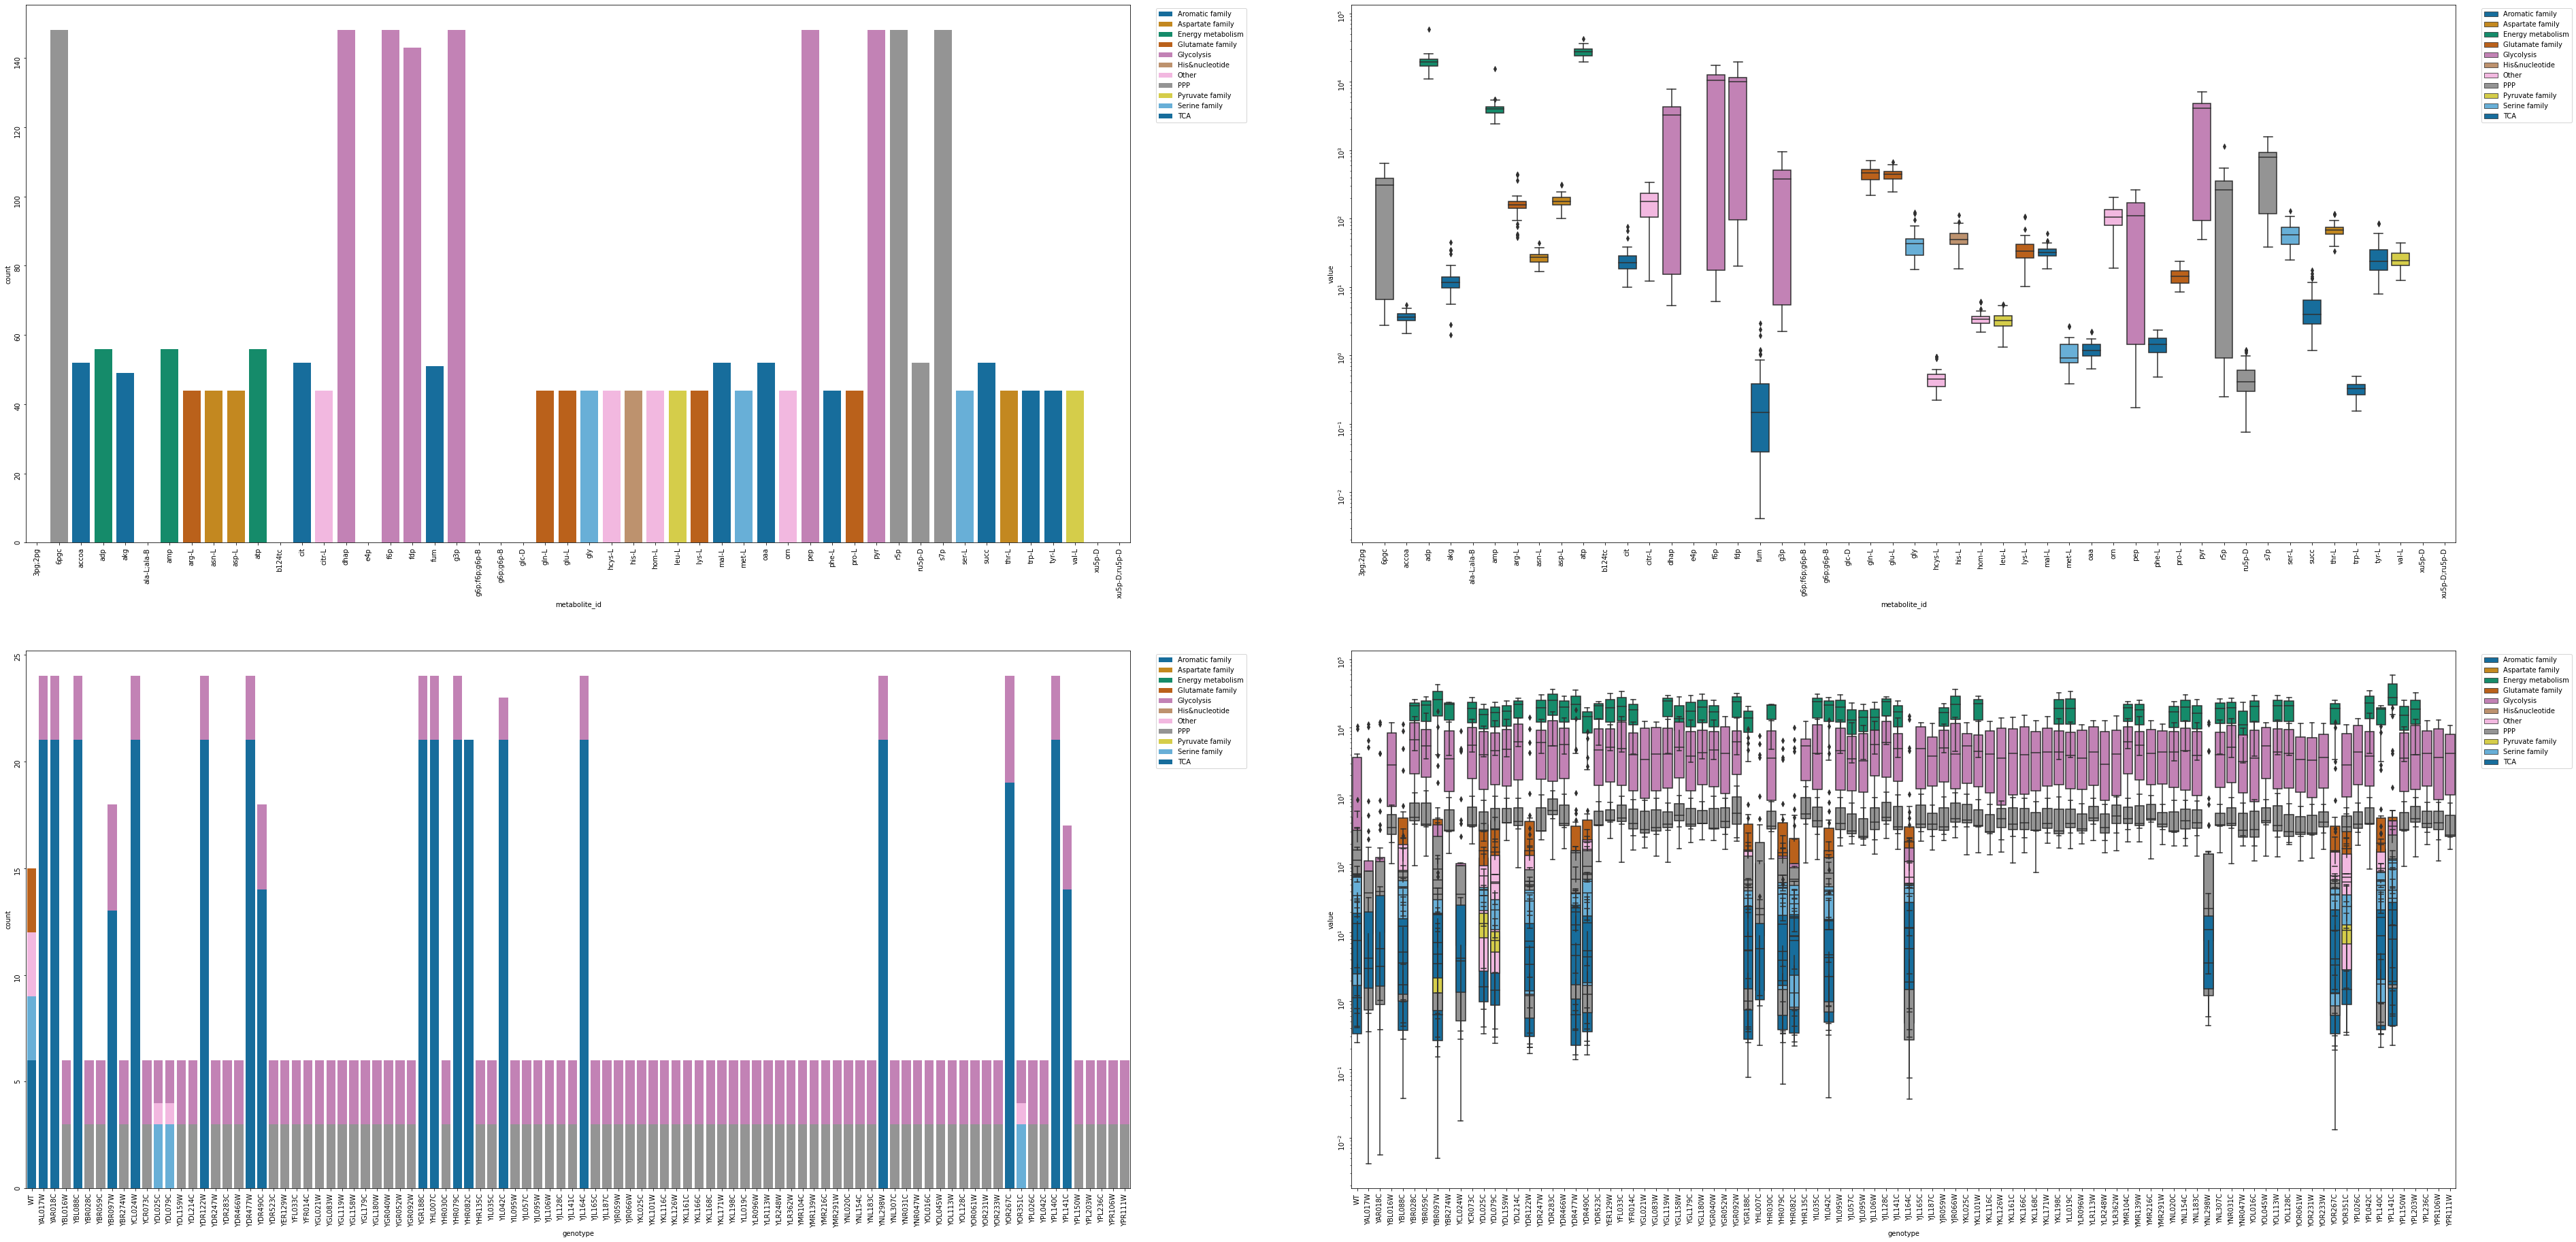

In [17]:
# we visualize some very simple statistics of the dataset
# we start by analysing the metabolites data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(64, 32))

df = metabolites_df[metabolites_df['pathway'] != 'Unknown']

g = sns.countplot(
    x='metabolite_id',
    # y='adj.r.squared',
    hue='pathway',
    # order='pathway',
    data=df,
    ax=ax1,
    dodge=False,
    palette='colorblind',
    # order=df['pathway'].value_counts().index[::-1]
)

ax1.tick_params(labelrotation=90)
ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

sns.boxplot(
    x='metabolite_id',
    y='value',
    hue='pathway',
    data=df,
    ax=ax2,
    dodge=False,
    palette='colorblind',
)

ax2.tick_params(labelrotation=90)
ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
ax2.set_yscale('log')

sns.countplot(
    x='genotype',
    hue='pathway',
    data=df,
    ax=ax3,
    dodge=False,
    palette='colorblind'
)

ax3.tick_params(labelrotation=90)
ax3.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

sns.boxplot(
    x='genotype',
    y='value',
    hue='pathway',
    data=df,
    ax=ax4,
    dodge=False,
    palette='colorblind',
)

ax4.tick_params(labelrotation=90)
ax4.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
ax4.set_yscale('log')

plt.show()

In [18]:
proteins_df

,ORF,sample,replicate,KO_ORF,KO_gene_name,value
0,YAL003W,KL_Try_001_a,1,WT,WT,8.778819
1,YAL005C,KL_Try_001_a,1,WT,WT,9.132257
2,YAL007C,KL_Try_001_a,1,WT,WT,5.188600
3,YAL012W,KL_Try_001_a,1,WT,WT,8.822701
4,YAL035W,KL_Try_001_a,1,WT,WT,4.919708
...,...,...,...,...,...,...
264259,YPR165W,KL_Try_99_c_1,6,YNL183C,NPR1,6.789486
264260,YPR181C,KL_Try_99_c_1,6,YNL183C,NPR1,6.055757
264261,YPR183W,KL_Try_99_c_1,6,YNL183C,NPR1,7.347029
264262,YPR187W,KL_Try_99_c_1,6,YNL183C,NPR1,4.298411


In [ ]:
mean_expression_per_knockout = proteins_df[
    (proteins_df['KO_ORF'].isin(metabolites_df['genotype']))
] \
    .groupby(['KO_gene_name', 'ORF'])['value'].mean() \
    .to_frame().pivot_table(index='ORF', columns='KO_gene_name', values='value')

sns.pairplot(
    data=mean_expression_per_knockout,
    diag_kind='kde'
)
    

In [28]:
metabolites_df

,metabolite_id,kegg_id,official_name,dataset,genotype,replicate,value,met_name,pathway
3431,trp-L,C00078,L-Tryptophan,3,YPL141C,1,0.424480,L-Tryptophan,Aromatic family
3414,trp-L,C00078,L-Tryptophan,3,YHR079C,3,0.371426,L-Tryptophan,Aromatic family
3415,trp-L,C00078,L-Tryptophan,3,YHR082C,1,0.326815,L-Tryptophan,Aromatic family
3416,trp-L,C00078,L-Tryptophan,3,YHR082C,2,0.340360,L-Tryptophan,Aromatic family
3417,trp-L,C00078,L-Tryptophan,3,YHR082C,3,0.315160,L-Tryptophan,Aromatic family
...,...,...,...,...,...,...,...,...,...
960,glc-D,C00031,D-Glucose,1,YIL095W,1,14862.885793,NaN,Unknown
959,glc-D,C00031,D-Glucose,1,YIL042C,1,18332.892252,NaN,Unknown
958,glc-D,C00031,D-Glucose,1,YIL035C,1,13004.592505,NaN,Unknown
967,glc-D,C00031,D-Glucose,1,YJL165C,1,19089.001739,NaN,Unknown


In [62]:
metabolites_df.groupby('genotype')['met_name'].value_counts()

genotype  met_name                  
WT        Glycine                       3
          L-Arginine                    3
          L-Asparagine                  3
          L-Aspartate                   3
          L-Citrulline                  3
                                       ..
YPR111W   Glyceraldehyde 3-phosphate    1
          Phosphoenolpyruvate           1
          Pyruvate                      1
          Sedoheptulose 7-phosphate     1
          alpha-D-Ribose 5-phosphate    1
Name: met_name, Length: 1540, dtype: int64

In [64]:
a = proteins_df[
    (proteins_df['KO_ORF'].isin(metabolites_df['genotype']))
] \
    .merge(metabolites_df[['genotype', 'met_name', 'pathway']], left_on='KO_ORF', right_on='genotype', how='inner') \
    .groupby(['KO_ORF', 'ORF'])['value'].mean() \
    .to_frame() 
b = metabolites_df.groupby('genotype')['met_name'].value_counts().index.get_level_values(1).to_frame()
# pd.concat([a, b], ignore_index=True, axis=1)
    # .pivot_table(index=['pathway', 'met_name'], columns='genotype', values='value')

# proteins_df[
#     (proteins_df['KO_ORF'].isin(metabolites_df['genotype']))
# ] \
#     .groupby(['KO_ORF', 'ORF'])['value'].mean() \
#     .to_frame().pivot_table(index='ORF', columns='KO_ORF', values='value') 
    # .merge(metabolites_df[['genotype', 'met_name', 'pathway']], left_on='KO_ORF', right_on='genotype')

In [94]:
mean_expression_per_knockout = proteins_df[
    (proteins_df['KO_ORF'].isin(metabolites_df['genotype']))
] \
    .merge(metabolites_df[['genotype', 'met_name', 'pathway']], left_on='KO_ORF', right_on='genotype', how='inner') \
    .query("met_name != 'Unknown'") \
    .groupby(['pathway', 'KO_ORF', 'ORF'])['value'].mean() \
    .to_frame() \
    .pivot_table(index=['KO_ORF', 'ORF'], columns='pathway', values='value') \
    .fillna(0)
    

In [95]:
mean_expression_per_knockout

pathway          Aromatic family  Aspartate family  Energy metabolism  \
KO_ORF  ORF                                                             
WT      YAL003W         8.673124          8.673124                0.0   
        YAL005C         8.943694          8.943694                0.0   
        YAL007C         5.021576          5.021576                0.0   
        YAL012W         8.747461          8.747461                0.0   
        YAL035W         5.392658          5.392658                0.0   
...                          ...               ...                ...   
YPR111W YPR165W         0.000000          0.000000                0.0   
        YPR181C         0.000000          0.000000                0.0   
        YPR183W         0.000000          0.000000                0.0   
        YPR187W         0.000000          0.000000                0.0   
        YPR191W         0.000000          0.000000                0.0   

pathway          Glutamate family  Glycolysis  His&nucleotide     Other  \
KO_ORF  ORF                                                               
WT      YAL003W          8.673124    8.673124        8.673124  8.673124   
        YAL005C          8.943694    8.943694        8.943694  8.943694   
        YAL007C          5.021576    5.021576        5.021576  5.021576   
        YAL012W          8.747461    8.747461        8.747461  8.747461   
        YAL035W          5.392658    5.392658        5.392658  5.392658   
...                           ...         ...             ...       ...   
YPR111W YPR165W          0.000000    7.042098        0.000000  0.000000   
        YPR181C          0.000000    5.665398        0.000000  0.000000   
        YPR183W          0.000000    7.348864        0.000000  0.000000   
        YPR187W          0.000000    4.289903        0.000000  0.000000   
        YPR191W          0.000000    7.441776        0.000000  0.000000   

pathway               PPP  Pyruvate family  Serine family       TCA  
KO_ORF  ORF                                                          
WT      YAL003W  8.673124         8.673124       8.673124  8.673124  
        YAL005C  8.943694         8.943694       8.943694  8.943694  
        YAL007C  5.021576         5.021576       5.021576  5.021576  
        YAL012W  8.747461         8.747461       8.747461  8.747461  
        YAL035W  5.392658         5.392658       5.392658  5.392658  
...                   ...              ...            ...       ...  
YPR111W YPR165W  7.042098         0.000000       0.000000  0.000000  
        YPR181C  5.665398         0.000000       0.000000  0.000000  
        YPR183W  7.348864         0.000000       0.000000  0.000000  
        YPR187W  4.289903         0.000000       0.000000  0.000000  
        YPR191W  7.441776         0.000000       0.000000  0.000000  

[69696 rows x 11 columns]

In [ ]:
reducer = umap.UMAP(
    n_neighbors=5,
    min_dist=0.3,
    metric='correlation'
)
scaler = StandardScaler()

scaled_expression = scaler.fit_transform(mean_expression_per_knockout.values)
embedding = reducer.fit_transform(scaled_expression)



In [ ]:
umap.plot.points(
    reducer,
    mean_expression_per_knockout.index.get_level_values(0)
)

In [47]:
df = raw_metabolites.merge(raw_proteins, left_on='genotype', right_on='KO_ORF')

In [60]:
df = raw_proteins[
    raw_proteins["KO_ORF"].isin(raw_metabolites['genotype'])
].groupby(by=['KO_ORF', 'ORF'])['value'].mean().transform(lambda x: np.log2(x)).to_frame().pivot_table(index='KO_ORF', columns='ORF', values='value')

diff_expressed_enzymes = df.iloc[1:] - df.iloc[0]

wt_metabolites = raw_metabolites[raw_metabolites['genotype'] == 'WT']['metabolite_id'].unique()
df = raw_metabolites[
    (raw_metabolites['metabolite_id'].isin(wt_metabolites))
]

df['value'] = df['value'].transform(lambda x: np.log2(x))
df = df.pivot_table(index='genotype', columns='metabolite_id', values='value')
diff_to_wt_meta = df.iloc[1:] - df.iloc[0]
df = diff_to_wt_meta.T.unstack(1).rename('meta_change').to_frame().reset_index().merge(diff_expressed_enzymes, left_on='genotype', right_on='KO_ORF')

diff_expressed_enzymes

/tmp/ipykernel_320/3481186179.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value'] = df['value'].transform(lambda x: np.log2(x))


ORF,YAL003W,YAL005C,YAL007C,YAL012W,YAL035W,YAL038W,YAL042W,YAL044C,YAR002C-A,YAR007C,...,YPR129W,YPR133C,YPR145W,YPR160W,YPR163C,YPR165W,YPR181C,YPR183W,YPR187W,YPR191W
KO_ORF,,,,,,,,,,,,,,,,,,,,,
YAL017W,-0.001724,-0.015140,0.033160,-0.011294,-0.021731,0.005452,-0.393861,0.022055,-0.045587,0.027340,...,-0.009357,-0.070945,0.046128,-0.055521,-0.000251,-0.046093,-0.013831,-0.024727,0.075281,-0.044966
YAR018C,0.017790,-0.061848,-0.005416,-0.040603,0.050090,0.018108,0.044935,0.083723,-0.013278,0.014316,...,0.045891,-0.014725,0.044635,-0.070358,-0.074966,0.005675,0.006765,0.004706,0.137208,-0.044369
YBL016W,-0.021557,-0.051508,-0.123918,0.054744,-0.563368,-0.102801,0.197982,0.228651,0.101341,0.084034,...,0.023554,0.164236,0.175555,-0.212236,-0.127275,-0.072379,-0.025990,0.077988,0.573968,-0.056929
YBL088C,0.002544,-0.030021,-0.012753,0.048740,-0.565576,-0.084588,-0.001584,0.081680,-0.009262,-0.036311,...,-0.036504,-0.209539,0.096788,-0.297094,-0.011931,-0.045398,-0.093384,0.061860,0.031216,-0.152670
YBR028C,-0.015099,-0.157559,-0.060817,0.022176,0.145094,0.021513,-0.065927,-0.004668,-0.038847,-0.013385,...,-0.079099,-0.021729,0.110726,-0.352181,-0.039678,-0.075014,0.002283,0.013617,-0.031740,-0.149110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPL150W,0.042242,-0.158855,-0.046662,0.034316,-0.785206,-0.019543,-0.365845,0.073155,-0.039937,-0.027050,...,-0.102177,-0.247262,0.147746,-0.278432,-0.016697,-0.084313,-0.019979,0.034682,0.083971,-0.201764
YPL203W,-0.038621,-0.064514,-0.006182,-0.033504,-0.029733,0.030898,-0.117283,0.051425,0.008793,0.056961,...,-0.054134,-0.432949,0.034139,-0.102661,-0.099293,-0.074494,0.012857,0.041142,0.142985,-0.085312
YPL236C,-0.053729,-0.071925,-0.093287,0.033571,-0.295738,-0.007034,-0.111528,0.036988,0.031659,-0.003273,...,-0.004715,-0.537680,0.090698,-0.508648,0.041570,-0.027348,-0.020393,0.021500,0.011195,-0.204618


### UMAP analysis of integration

In [13]:
df = raw_proteins[
    raw_proteins["KO_ORF"].isin(raw_metabolites['genotype'])
].groupby(by=['KO_ORF', 'ORF'])['value'].mean().transform(lambda x: np.log2(x)).to_frame().pivot_table(index='KO_ORF', columns='ORF', values='value')

diff_expressed_enzymes = df.iloc[1:] - df.iloc[0]

wt_metabolites = raw_metabolites[raw_metabolites['genotype'] == 'WT']['metabolite_id'].unique()
df = raw_metabolites[
    (raw_metabolites['metabolite_id'].isin(wt_metabolites))
]

df['value'] = df['value'].transform(lambda x: np.log2(x))
df = df.pivot_table(index='genotype', columns='metabolite_id', values='value')
diff_to_wt_meta = df.iloc[1:] - df.iloc[0]
df = diff_to_wt_meta.T.unstack(1).rename('meta_change').to_frame().reset_index().merge(diff_expressed_enzymes, left_on='genotype', right_on='KO_ORF').dropna(axis=0)

targets = ['genotype', 'metabolite_id', 'meta_change']

/tmp/ipykernel_320/4167516597.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value'] = df['value'].transform(lambda x: np.log2(x))


/home/tvangraft/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<AxesSubplot:>

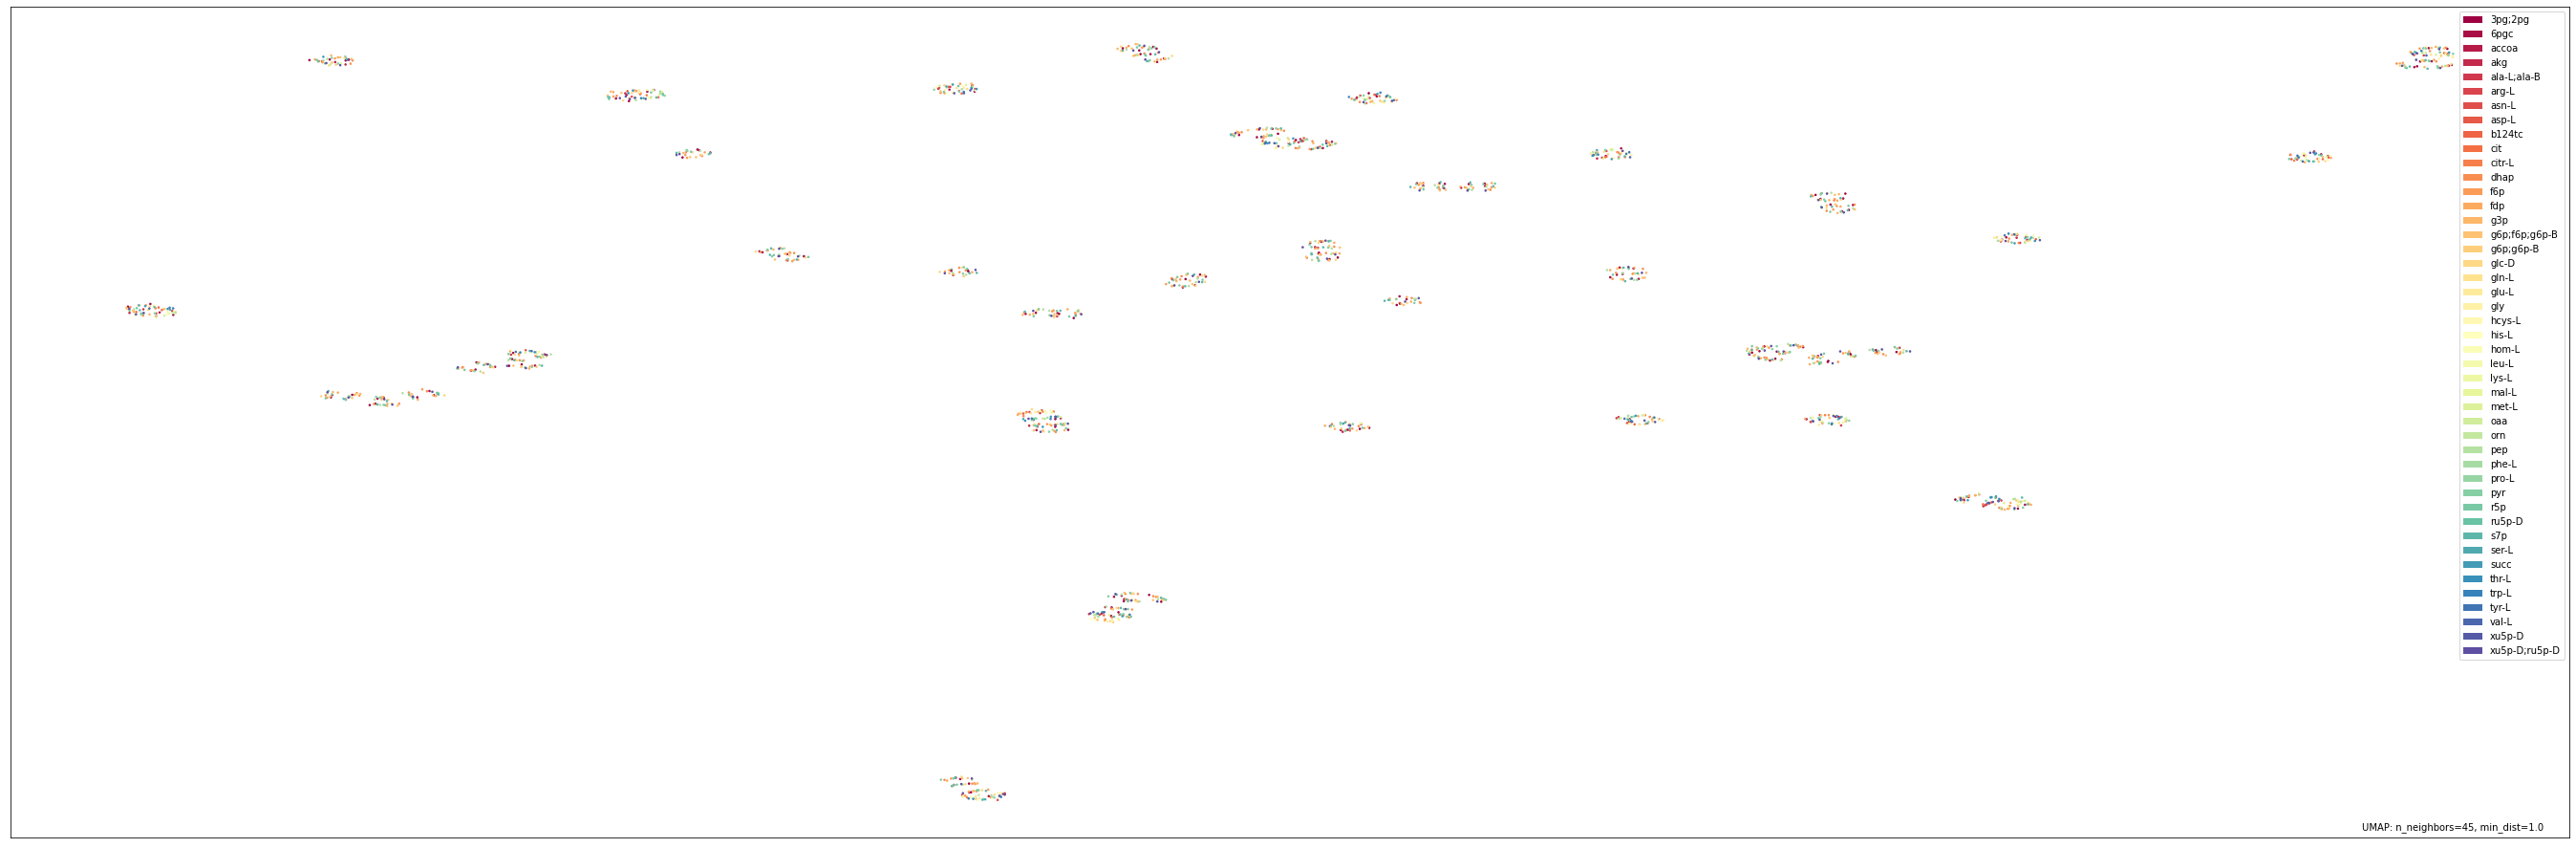

In [12]:
features = df.loc[:, ~df.columns.isin(targets)]

reducer = umap.UMAP(
    n_neighbors=len(df['metabolite_id'].unique()),
    metric='euclidean',
    min_dist=1.0
)
scaler = StandardScaler()

scaled_expression = scaler.fit_transform(features.values)
embedding = reducer.fit_transform(scaled_expression)

fig, ax = plt.subplots(1, 1, figsize=(48, 16))

umap.plot.points(
    reducer,
    df['metabolite_id'],
    ax=ax
)

In [ ]:
def mapper(*args, **kwargs):
    df = kwargs['data']
    features = df.loc[:, ~df.columns.isin(targets)]

    reducer = umap.UMAP(
        n_neighbors=4,
        metric='euclidean',
        min_dist=0.1
    )

    scaled_expression = StandardScaler().fit_transform(features.values)
    reducer.fit(scaled_expression)

    umap.plot.points(
        reducer,
        df['metabolite_id'],
        ax=plt.gca(),
    )


g = sns.FacetGrid(df, col='genotype', col_wrap=10)
g.map_dataframe(mapper)

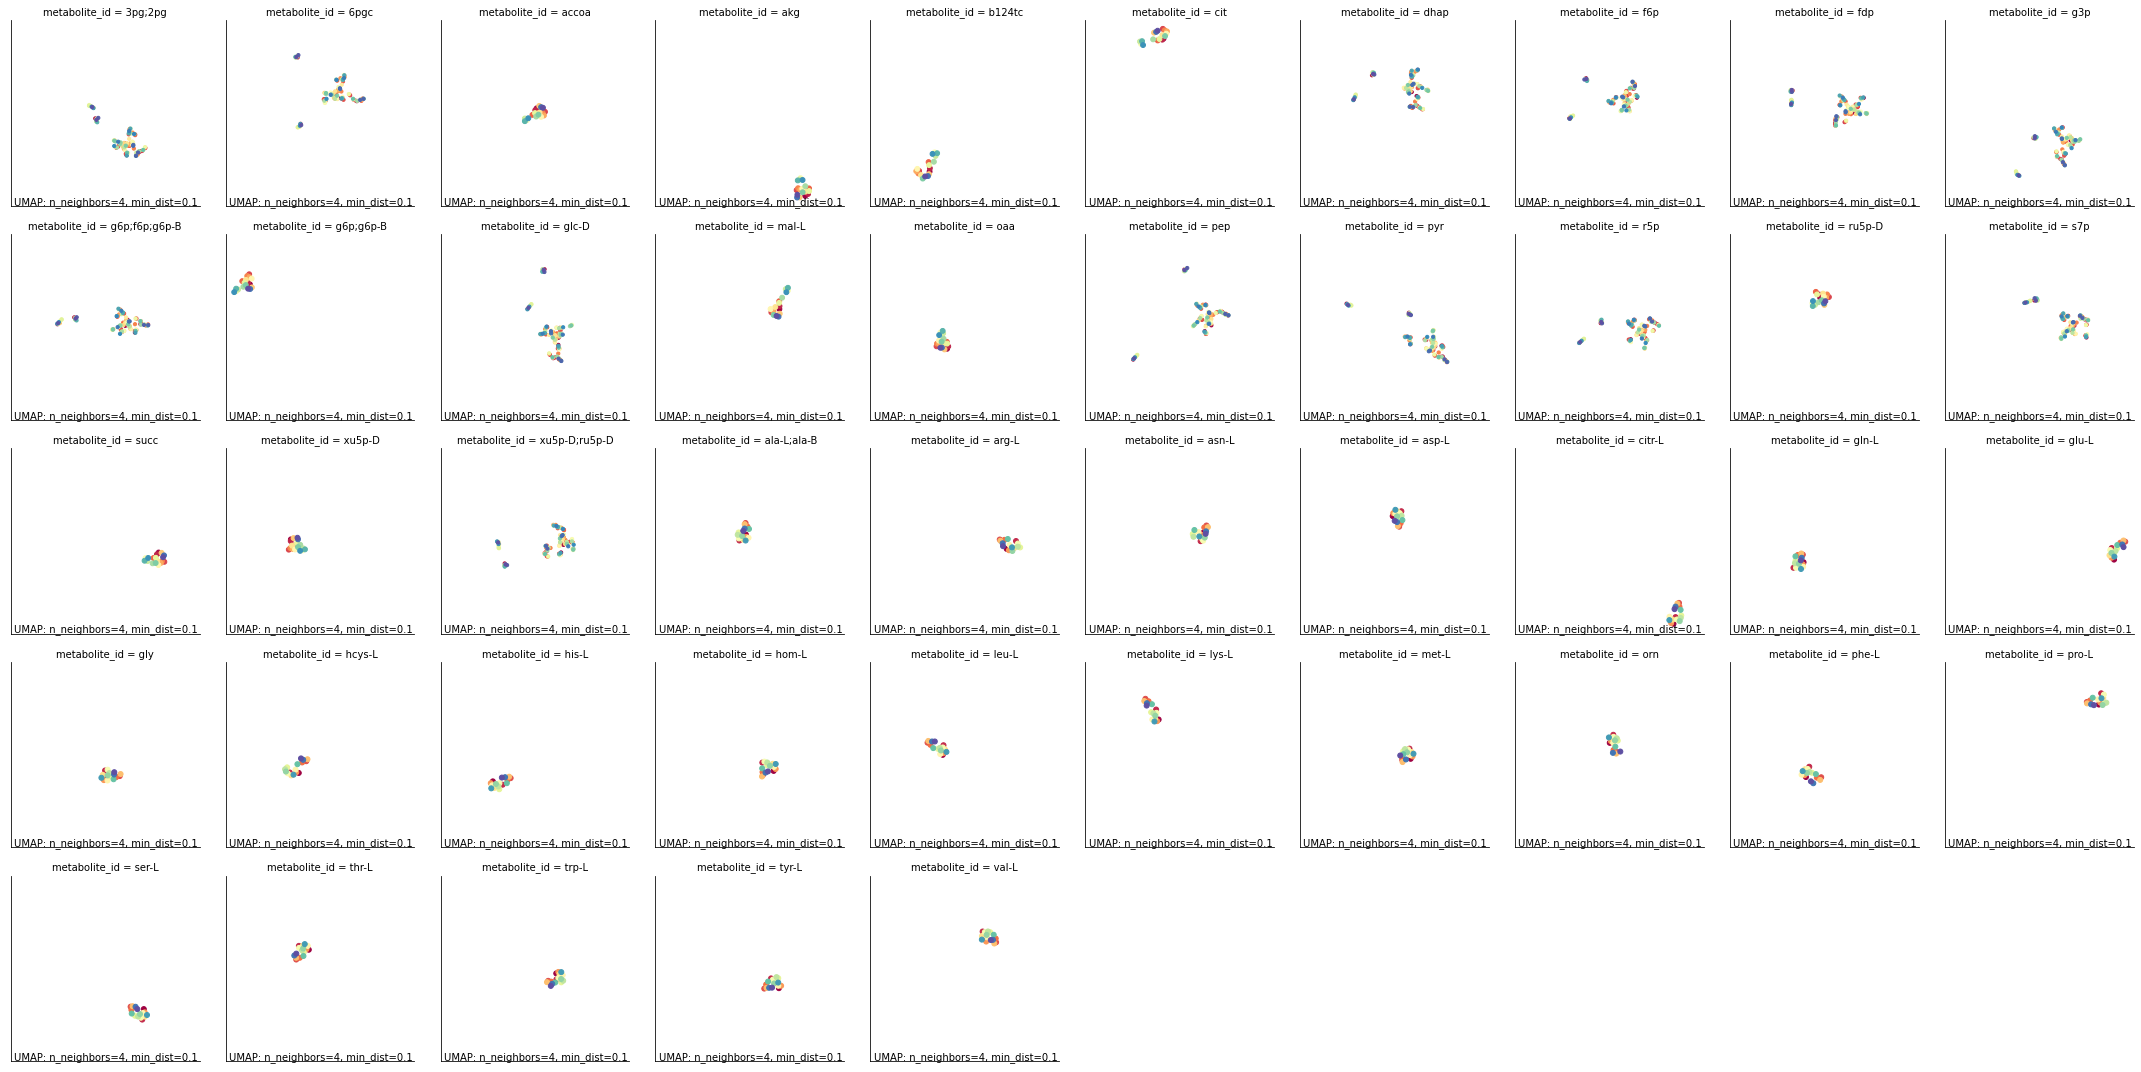

In [14]:
def mapper(*args, **kwargs):
    df = kwargs['data']
    features = df.loc[:, ~df.columns.isin(targets)]

    reducer = umap.UMAP(
        n_neighbors=4,
        metric='euclidean',
        min_dist=0.1
    )

    scaled_expression = StandardScaler().fit_transform(features.values)
    reducer.fit(scaled_expression)

    umap.plot.points(
        reducer,
        df['genotype'],
        ax=plt.gca(),
    )


g = sns.FacetGrid(df, col='metabolite_id', col_wrap=10)
g.map_dataframe(mapper)

### PCA analysis of integration

,genotype,metabolite_id,meta_change,YAL003W,YAL005C,YAL007C,YAL012W,YAL035W,YAL038W,YAL042W,...,YPR129W,YPR133C,YPR145W,YPR160W,YPR163C,YPR165W,YPR181C,YPR183W,YPR187W,YPR191W
0,YAL017W,3pg;2pg,-2.530063,-0.001724,-0.015140,0.033160,-0.011294,-0.021731,0.005452,-0.393861,...,-0.009357,-0.070945,0.046128,-0.055521,-0.000251,-0.046093,-0.013831,-0.024727,0.075281,-0.044966
1,YAL017W,6pgc,-1.812487,-0.001724,-0.015140,0.033160,-0.011294,-0.021731,0.005452,-0.393861,...,-0.009357,-0.070945,0.046128,-0.055521,-0.000251,-0.046093,-0.013831,-0.024727,0.075281,-0.044966
2,YAL017W,accoa,-0.211363,-0.001724,-0.015140,0.033160,-0.011294,-0.021731,0.005452,-0.393861,...,-0.009357,-0.070945,0.046128,-0.055521,-0.000251,-0.046093,-0.013831,-0.024727,0.075281,-0.044966
3,YAL017W,akg,0.098901,-0.001724,-0.015140,0.033160,-0.011294,-0.021731,0.005452,-0.393861,...,-0.009357,-0.070945,0.046128,-0.055521,-0.000251,-0.046093,-0.013831,-0.024727,0.075281,-0.044966
8,YAL017W,b124tc,-0.276759,-0.001724,-0.015140,0.033160,-0.011294,-0.021731,0.005452,-0.393861,...,-0.009357,-0.070945,0.046128,-0.055521,-0.000251,-0.046093,-0.013831,-0.024727,0.075281,-0.044966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,YPR111W,pep,4.062572,-0.023325,-0.052919,-0.030465,0.033469,-0.414988,-0.091205,0.037067,...,0.045508,-0.331802,0.034874,-0.331726,0.016716,0.008628,-0.078073,0.051957,0.105102,-0.090650
4263,YPR111W,pyr,3.239338,-0.023325,-0.052919,-0.030465,0.033469,-0.414988,-0.091205,0.037067,...,0.045508,-0.331802,0.034874,-0.331726,0.016716,0.008628,-0.078073,0.051957,0.105102,-0.090650
4264,YPR111W,r5p,4.140245,-0.023325,-0.052919,-0.030465,0.033469,-0.414988,-0.091205,0.037067,...,0.045508,-0.331802,0.034874,-0.331726,0.016716,0.008628,-0.078073,0.051957,0.105102,-0.090650
4266,YPR111W,s7p,1.637560,-0.023325,-0.052919,-0.030465,0.033469,-0.414988,-0.091205,0.037067,...,0.045508,-0.331802,0.034874,-0.331726,0.016716,0.008628,-0.078073,0.051957,0.105102,-0.090650


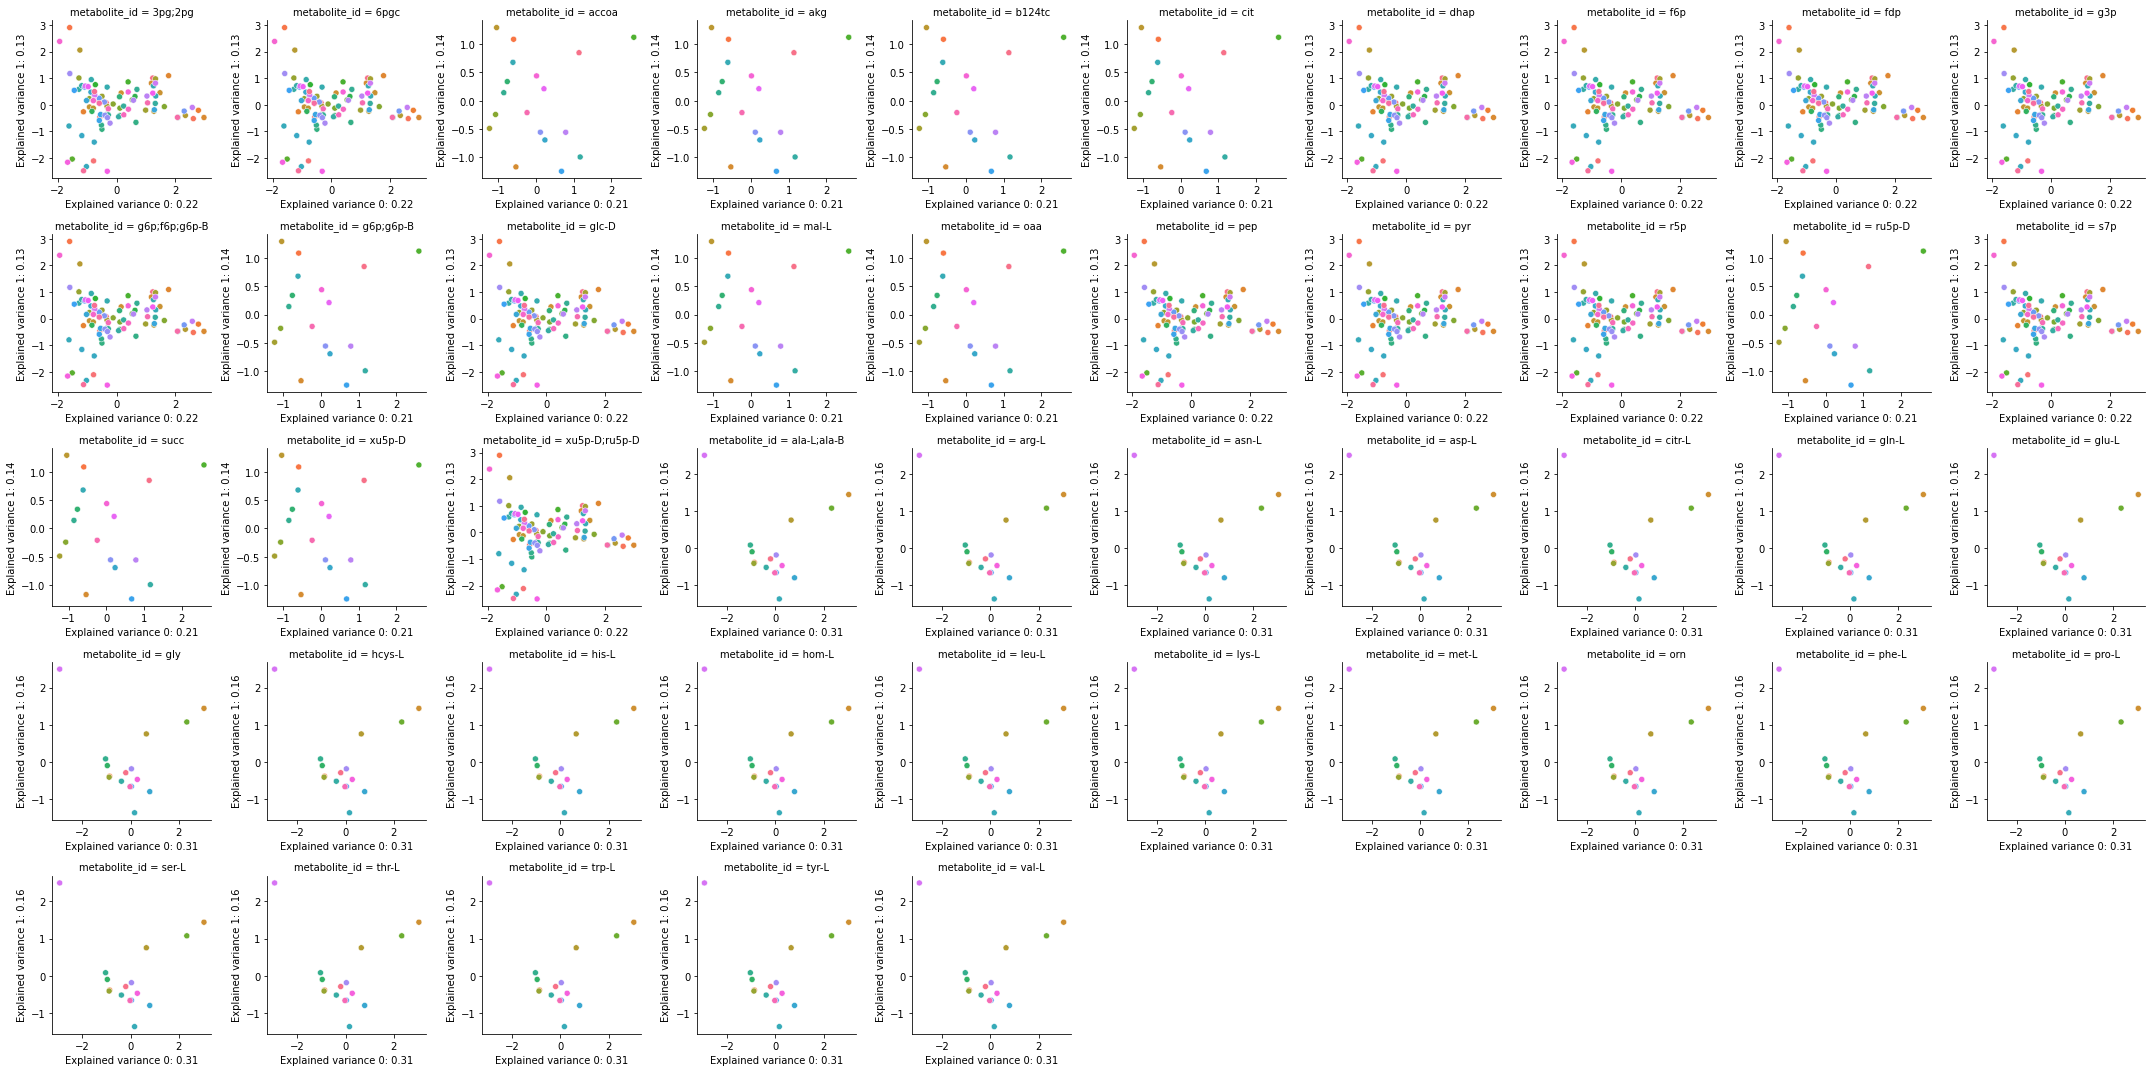

In [45]:
def mapper(*args, **kwargs):
    df = kwargs['data']
    pca = PCA(n_components=10)
    features = df.loc[:, ~df.columns.isin(targets)]

    embedding = pca.fit_transform(features.values)
    sns.scatterplot(
        x=embedding[:, 0],
        y=embedding[:, 1],
        hue=df['genotype'],
        ax=plt.gca()
    )

    plt.gca().set_xlabel(f'Explained variance 0: {pca.explained_variance_ratio_[0]:.2}')
    plt.gca().set_ylabel(f'Explained variance 1: {pca.explained_variance_ratio_[1]:.2}')


g = sns.FacetGrid(df, col='metabolite_id', col_wrap=10, sharex=False, sharey=False, legend_out=True)
g.map_dataframe(mapper)

df